In [94]:
import numpy as np
import pandas as pd
%matplotlib inline

# Load specific forecasting tools
from statsmodels.tsa.api import VAR, DynamicVAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

# Load datasets
# Load datasets
df = pd.read_csv('Data\\ts_dataset_firenze.csv', index_col ='index', parse_dates=True)
df.index.freq='MS'

In [95]:
df.columns

Index(['prezzi_vendita', 'reddito', 'arrivi_tot', 'arrivi_ita', 'arrivi_str',
       'anagr_altri_com_canc', 'anagr_altri_com_iscr', 'canc_anagr',
       'canc_anagr_altrimot', 'canc_anagr_est', 'iscr_anagr',
       'iscr_anagr_altrimot', 'iscr_anagr_est', 'morti', 'nati_vivi',
       'popol_fin', 'saldo_altrimot', 'saldo_migr', 'saldo_migr_e_altrimot',
       'saldo_migr_est', 'saldo_migr_int', 'saldo_naturale',
       'saldotot_incr_decr', 'pop_density', 'reddito_procapite_ann', 'UL_BDE',
       'ADD_BDE', 'UL_C', 'ADD_C', 'UL_F', 'ADD_F', 'UL_G', 'ADD_G', 'UL_HI',
       'ADD_HI', 'UL_JKL', 'ADD_JKL', 'UL_MN', 'ADD_MN', 'UL_OPQ', 'ADD_OPQ',
       'UL_RSTU', 'ADD_RSTU', 'reddito_procapite_mens'],
      dtype='object')

In [96]:
df = df.loc[:'2019']
df = df[['prezzi_vendita','reddito_procapite_ann']]
df.tail(30)

,prezzi_vendita,reddito_procapite_ann
index,,
2017-07-01,3602.0,17542.713484
2017-08-01,3602.0,17542.713484
2017-09-01,3624.0,17542.713484
2017-10-01,3629.0,17542.713484
2017-11-01,3629.0,17542.713484
2017-12-01,3640.0,17542.713484
2018-01-01,3649.0,18054.509395
2018-02-01,3663.0,18054.509395
2018-03-01,3672.0,18054.509395


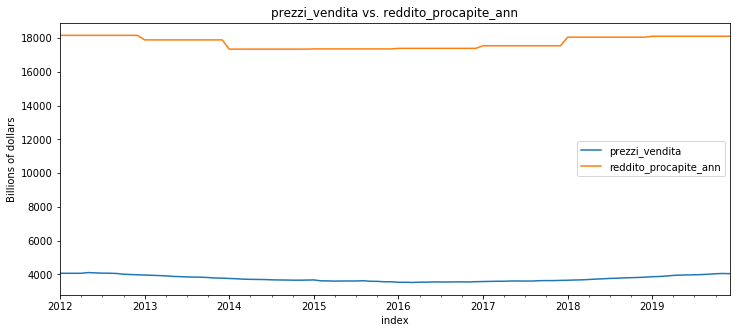

In [97]:
title = 'prezzi_vendita vs. reddito_procapite_ann'
ylabel='Billions of dollars'
xlabel=''

ax = df['prezzi_vendita'].plot(figsize=(12,5),title=title,legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
df['reddito_procapite_ann'].plot(legend=True);

## Test for stationarity, perform any necessary transformations

In [98]:
def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [99]:
adf_test(df['prezzi_vendita'],title='prezzi_vendita')

Augmented Dickey-Fuller Test: prezzi_vendita
ADF test statistic      -2.615921
p-value                  0.089751
# lags used              7.000000
# observations          88.000000
critical value (1%)     -3.506944
critical value (5%)     -2.894990
critical value (10%)    -2.584615
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [100]:
adf_test(df['reddito_procapite_ann'], title='reddito_procapite_ann')

Augmented Dickey-Fuller Test: reddito_procapite_ann
ADF test statistic      -1.290810
p-value                  0.633366
# lags used              0.000000
# observations          95.000000
critical value (1%)     -3.501137
critical value (5%)     -2.892480
critical value (10%)    -2.583275
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [101]:
df_transformed = df.diff(2)

In [102]:
df_transformed = df_transformed.dropna()
adf_test(df_transformed['prezzi_vendita'], title='prezzi_vendita_sd')
print()
adf_test(df_transformed['reddito_procapite_ann'], title='reddito_procapite_ann_sd')

Augmented Dickey-Fuller Test: prezzi_vendita_sd
ADF test statistic      -0.944619
p-value                  0.772924
# lags used              6.000000
# observations          87.000000
critical value (1%)     -3.507853
critical value (5%)     -2.895382
critical value (10%)    -2.584824
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary

Augmented Dickey-Fuller Test: reddito_procapite_ann_sd
ADF test statistic      -1.694640
p-value                  0.433876
# lags used             10.000000
# observations          83.000000
critical value (1%)     -3.511712
critical value (5%)     -2.897048
critical value (10%)    -2.585713
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [103]:
df_transformed.head()

,prezzi_vendita,reddito_procapite_ann
index,,
2012-03-01,0.0,0.0
2012-04-01,0.0,0.0
2012-05-01,43.0,0.0
2012-06-01,25.0,0.0
2012-07-01,-35.0,0.0


In [104]:
len(df_transformed)

94

### Train/test split
It will be useful to define a number of observations variable for our test set. For this analysis, let's use 12 months.

In [105]:
nobs=10
train, test = df_transformed[0:-nobs], df_transformed[-nobs:]

In [106]:
print(train.shape)
print(test.shape)

(84, 2)
(10, 2)


## VAR Model Order Selection
We'll fit a series of models using the first seven p-values, and base our final selection on the model that provides the lowest AIC and BIC scores.

In [107]:
model = VAR(train)
for p in [1,2,3,4,5,6,7]:
    results = model.fit(p)
    print('Order =', p)
    print('AIC: ', results.aic)
    print('BIC: ', results.bic)
    print()

Order = 1
AIC:  15.004855408602946
BIC:  15.179711356154508

Order = 2
AIC:  14.926659048967585
BIC:  15.220161396194932

Order = 3
AIC:  14.698146528698283
BIC:  15.112001938147841

Order = 4
AIC:  14.676461715782938
BIC:  15.212417708584562

Order = 5
AIC:  14.686525679385056
BIC:  15.346371916780937

Order = 6
AIC:  14.698103318421676
BIC:  15.483672927318207

Order = 7
AIC:  14.742923958844608
BIC:  15.656094902423966



The VAR(4) model seems to return the lowest combined scores.<br>
Just to verify that both variables are included in the model we can run <tt>.endog_names</tt>

In [108]:
model.endog_names

['prezzi_vendita', 'reddito_procapite_ann']

## Fit the VAR(4) Model

In [109]:
results = model.fit(4)
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 15, Jan, 2021
Time:                     19:47:12
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    15.2124
Nobs:                     80.0000    HQIC:                   14.8913
Log likelihood:          -796.089    FPE:                2.36994e+06
AIC:                      14.6765    Det(Omega_mle):     1.91486e+06
--------------------------------------------------------------------
Results for equation prezzi_vendita
                              coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------------------
const                           -0.656568         1.606169           -0.409           0.683
L1.prezzi_vendita                1.079108         0.114814            9.399           0.000
L1.redd

## Predict the next 10 values
Unlike the VARMAX model we'll use in upcoming sections, the VAR <tt>.forecast()</tt> function requires that we pass in a lag order number of previous observations as well. Unfortunately this forecast tool doesn't provide a DateTime index - we'll have to do that manually.

In [110]:
lag_order = results.k_ar
lag_order

4

In [111]:
z = results.forecast(y=train.values[-lag_order:], steps=10)
z

array([[27.56800773, 62.25836438],
       [26.07303917, 93.86747882],
       [26.68156285, 84.42638029],
       [21.84379028, 48.99274801],
       [17.97715274, 39.30608876],
       [17.33727877, 40.81732381],
       [15.55125969, 31.42191824],
       [12.39605452, 26.4402565 ],
       [10.48553331, 30.76338738],
       [ 9.41551195, 30.15512365]])

In [112]:
test

,prezzi_vendita,reddito_procapite_ann
index,,
2019-03-01,40.0,0.0
2019-04-01,65.0,0.0
2019-05-01,56.0,0.0
2019-06-01,29.0,0.0
2019-07-01,16.0,0.0
2019-08-01,21.0,0.0
2019-09-01,34.0,0.0
2019-10-01,49.0,0.0
2019-11-01,44.0,0.0


In [113]:
idx = pd.date_range('1/3/2019', periods=10, freq='MS') #where the test set starts
df_forecast = pd.DataFrame(z, index=idx, columns=['prezzi_vendita2d','reddito_procapite_ann2d'])
df_forecast

,prezzi_vendita2d,reddito_procapite_ann2d
2019-02-01,27.568008,62.258364
2019-03-01,26.073039,93.867479
2019-04-01,26.681563,84.426380
2019-05-01,21.843790,48.992748
2019-06-01,17.977153,39.306089
2019-07-01,17.337279,40.817324
2019-08-01,15.551260,31.421918
2019-09-01,12.396055,26.440257
2019-10-01,10.485533,30.763387
2019-11-01,9.415512,30.155124


## Invert the Transformation
Remember that the forecasted values represent second-order differences. To compare them to the original data we have to roll back each difference. To roll back a first-order difference we take the most recent value on the training side of the original series, and add it to a cumulative sum of forecasted values. When working with second-order differences we first must perform this operation on the most recent first-order difference.

Here we'll use the <tt>nobs</tt> variable we defined during the train/test/split step.

In [114]:
# Add the most recent first difference from the training side of the original dataset to the forecast cumulative sum
df_forecast['prezzi_vendita1d'] = (df['prezzi_vendita'].iloc[-nobs-1]-df['prezzi_vendita'].iloc[-nobs-2]) + df_forecast['prezzi_vendita2d'].cumsum()

# Now build the forecast values from the first difference set
df_forecast['prezzi_vendita_forecast'] = df['prezzi_vendita'].iloc[-nobs-1] + df_forecast['prezzi_vendita1d'].cumsum()

In [115]:
# Add the most recent first difference from the training side of the original dataset to the forecast cumulative sum
df_forecast['reddito_procapite_ann1d'] = (df['reddito_procapite_ann'].iloc[-nobs-1]-df['reddito_procapite_ann'].iloc[-nobs-2]) + df_forecast['reddito_procapite_ann2d'].cumsum()

# Now build the forecast values from the first difference set
df_forecast['reddito_procapite_ann_forecast'] = df['reddito_procapite_ann'].iloc[-nobs-1] + df_forecast['reddito_procapite_ann1d'].cumsum()

In [116]:
df_forecast

,prezzi_vendita2d,reddito_procapite_ann2d,prezzi_vendita1d,prezzi_vendita_forecast,reddito_procapite_ann1d,reddito_procapite_ann_forecast
2019-02-01,27.568008,62.258364,38.568008,3909.568008,62.258364,18172.468557
2019-03-01,26.073039,93.867479,64.641047,3974.209055,156.125843,18328.594400
2019-04-01,26.681563,84.426380,91.322610,4065.531664,240.552223,18569.146623
2019-05-01,21.843790,48.992748,113.166400,4178.698064,289.544972,18858.691595
2019-06-01,17.977153,39.306089,131.143553,4309.841617,328.851060,19187.542655
2019-07-01,17.337279,40.817324,148.480832,4458.322449,369.668384,19557.211039
2019-08-01,15.551260,31.421918,164.032091,4622.354540,401.090302,19958.301342
2019-09-01,12.396055,26.440257,176.428146,4798.782686,427.530559,20385.831900
2019-10-01,10.485533,30.763387,186.913679,4985.696365,458.293946,20844.125847
2019-11-01,9.415512,30.155124,196.329191,5182.025556,488.449070,21332.574916


## Plot the results
The VARResults object offers a couple of quick plotting tools:

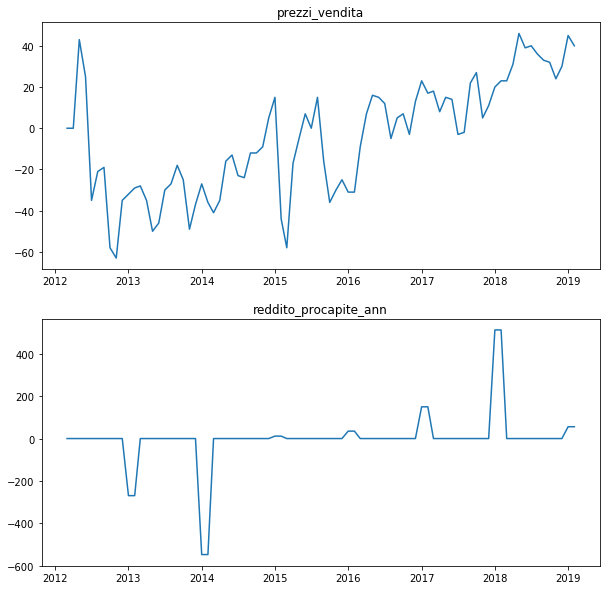

In [118]:
results.plot();

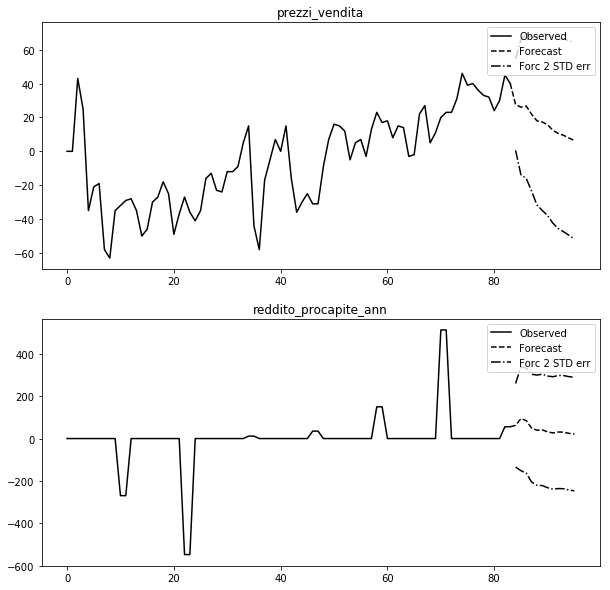

In [119]:
results.plot_forecast(12);

But for our investigation we want to plot predicted values against our test set.

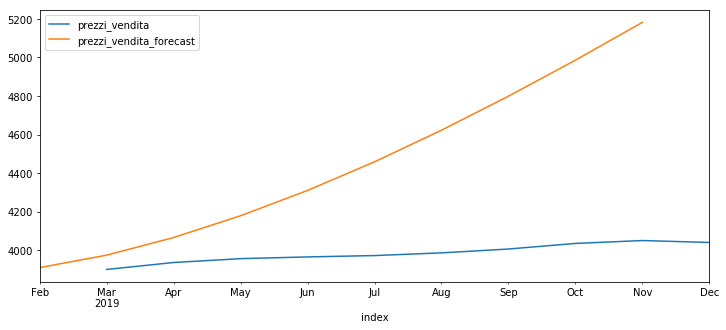

In [120]:
df['prezzi_vendita'][-nobs:].plot(figsize=(12,5),legend=True).autoscale(axis='x',tight=True)
df_forecast['prezzi_vendita_forecast'].plot(legend=True);

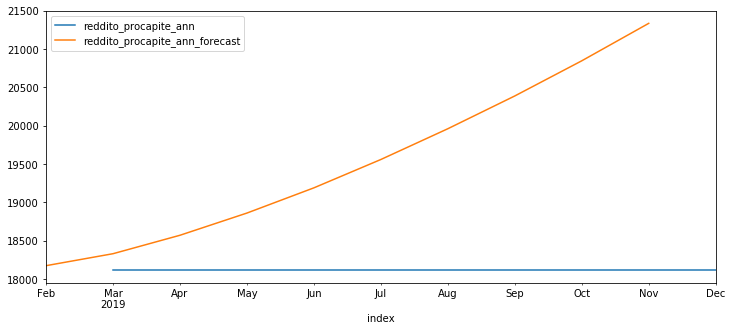

In [121]:
df['reddito_procapite_ann'][-nobs:].plot(figsize=(12,5),legend=True).autoscale(axis='x',tight=True)
df_forecast['reddito_procapite_ann_forecast'].plot(legend=True);

### Evaluate the model

&nbsp;&nbsp;&nbsp;&nbsp;$RMSE = \sqrt{{\frac 1 L} \sum\limits_{l=1}^L (y_{T+l} - \hat y_{T+l})^2}$<br><br>
where $T$ is the last observation period and $l$ is the lag.

In [122]:
RMSE1 = rmse(df['prezzi_vendita'][-nobs:], df_forecast['prezzi_vendita_forecast'])
print(f'Money VAR(5) RMSE: {RMSE1:.3f}')

Money VAR(5) RMSE: 594.933


In [126]:
df['prezzi_vendita'][-nobs:].std()

48.56427585055592

In [123]:
RMSE2 = rmse(df['reddito_procapite_ann'][-nobs:], df_forecast['reddito_procapite_ann_forecast'])
print(f'Spending VAR(5) RMSE: {RMSE2:.3f}')

Spending VAR(5) RMSE: 1747.246


In [129]:
df['reddito_procapite_ann'][-nobs:].std()

0.0

## Let's compare these results to individual AR(5) models

In [130]:
from statsmodels.tsa.ar_model import AR,ARResults

### Money

In [132]:
modelM = AR(train['prezzi_vendita'])
AR4fit1 = modelM.fit(maxlag=4,method='mle')
print(f'Lag: {AR5fit1.k_ar}')
print(f'Coefficients:\n{AR5fit1.params}')

Lag: 4
Coefficients:
const                0.012758
L1.prezzi_vendita    1.060912
L2.prezzi_vendita   -0.643517
L3.prezzi_vendita    0.668903
L4.prezzi_vendita   -0.210123
dtype: float64


In [137]:
start=len(train)
end=len(train)+len(test)-1
z1 = pd.DataFrame(AR4fit1.predict(start=start, end=end, dynamic=False),columns=['prezzi_vendita'])

In [138]:
z1

,prezzi_vendita
2019-03-01,28.515102
2019-04-01,28.321039
2019-05-01,29.009515
2019-06-01,23.233138
2019-07-01,18.945302
2019-08-01,18.614785
2019-09-01,17.014928
2019-10-01,13.875917
2019-11-01,12.255129
2019-12-01,11.554923


### Invert the Transformation, Evaluate the Forecast

In [139]:
# Add the most recent first difference from the training set to the forecast cumulative sum
z1['prezzi_vendita1d'] = (df['prezzi_vendita'].iloc[-nobs-1]-df['prezzi_vendita'].iloc[-nobs-2]) + z1['prezzi_vendita'].cumsum()

# Now build the forecast values from the first difference set
z1['prezzi_vendita_Forecast'] = df['prezzi_vendita'].iloc[-nobs-1] + z1['prezzi_vendita1d'].cumsum()

In [140]:
z1

,prezzi_vendita,prezzi_vendita1d,prezzi_vendita_Forecast
2019-03-01,28.515102,39.515102,3910.515102
2019-04-01,28.321039,67.836141,3978.351243
2019-05-01,29.009515,96.845656,4075.196900
2019-06-01,23.233138,120.078795,4195.275694
2019-07-01,18.945302,139.024097,4334.299791
2019-08-01,18.614785,157.638882,4491.938674
2019-09-01,17.014928,174.653810,4666.592484
2019-10-01,13.875917,188.529727,4855.122211
2019-11-01,12.255129,200.784856,5055.907067
2019-12-01,11.554923,212.339779,5268.246846


In [141]:
RMSE3 = rmse(df['prezzi_vendita'][-nobs:], z1['prezzi_vendita_Forecast'])

print(f'Money VAR(5) RMSE: {RMSE1:.3f}')
print(f'Money  AR(5) RMSE: {RMSE3:.3f}')

Money VAR(5) RMSE: 594.933
Money  AR(5) RMSE: 639.202


## Personal Spending

In [40]:
modelS = AR(train['Spending'])
AR5fit2 = modelS.fit(maxlag=5,method='mle')
print(f'Lag: {AR5fit2.k_ar}')
print(f'Coefficients:\n{AR5fit2.params}')

Lag: 5
Coefficients:
const          0.221210
L1.Spending   -0.913123
L2.Spending   -0.677036
L3.Spending   -0.450797
L4.Spending   -0.273218
L5.Spending   -0.159475
dtype: float64


In [41]:
z2 = pd.DataFrame(AR5fit2.predict(start=start, end=end, dynamic=False),columns=['Spending'])
z2

,Spending
2015-01-01,30.883394
2015-02-01,-2.227348
2015-03-01,-8.838613
2015-04-01,6.673539
2015-05-01,-4.483675
2015-06-01,-0.535010
2015-07-01,3.507013
2015-08-01,-1.011475
2015-09-01,-0.827619
2015-10-01,0.941987


### Invert the Transformation, Evaluate the Forecast

In [42]:
# Add the most recent first difference from the training set to the forecast cumulative sum
z2['Spending1d'] = (df['Spending'].iloc[-nobs-1]-df['Spending'].iloc[-nobs-2]) + z2['Spending'].cumsum()

# Now build the forecast values from the first difference set
z2['SpendingForecast'] = df['Spending'].iloc[-nobs-1] + z2['Spending1d'].cumsum()

In [43]:
z2

,Spending,Spending1d,SpendingForecast
2015-01-01,30.883394,41.483394,12103.483394
2015-02-01,-2.227348,39.256045,12142.739439
2015-03-01,-8.838613,30.417433,12173.156872
2015-04-01,6.673539,37.090972,12210.247844
2015-05-01,-4.483675,32.607297,12242.855140
2015-06-01,-0.535010,32.072286,12274.927426
2015-07-01,3.507013,35.579299,12310.506726
2015-08-01,-1.011475,34.567824,12345.074550
2015-09-01,-0.827619,33.740206,12378.814756
2015-10-01,0.941987,34.682193,12413.496948


In [44]:
RMSE4 = rmse(df['Spending'][-nobs:], z2['SpendingForecast'])

print(f'Spending VAR(5) RMSE: {RMSE2:.3f}')
print(f'Spending  AR(5) RMSE: {RMSE4:.3f}')

Spending VAR(5) RMSE: 37.001
Spending  AR(5) RMSE: 34.121


<strong>CONCLUSION:</strong> It looks like the VAR(5) model did <em>not</em> do better than the individual AR(5) models. That's ok - we know more than we did before. In the next section we'll look at VARMA and see if the addition of a $q$ parameter helps. Great work!

### Differences

An ARMAX model has the form

$yt=βxt+φ1yt−1+…+φpyt−p+εt+θ1εt−1+…+θqεt−q$
(one could also have more than one exogenous variable and/or lags of exogenous variables in the above equation.)

The dependent variable is a univariate time series.
The model cannot be used for forecasting yt+h unless one has the future values of the independent variable xt+h available, or has a separate model for predicting xt+h.
The model is estimated using maximum likelihood (slow), often using a state space representation.
Allowing for both AR and MA terms offers a parsimonious representation of the process.
A VAR model has the form

$zt=φ1zt−1+…+φpzt−p+εt$
where z is a vector; for example, $z=(y,x)′$.

The dependent variable is a multivariate time series.
The model can be used for forecasting all components of zt+h, e.g. for z=(y,x)′. Given data up to and including time t, forecasts for time t+1 are straightforward to obtain; forecasts for t+h where h>1 can be obtained iteratively.
The model can be estimated using OLS or GLS (fast).
Lack of MA terms may (or may not) require large AR order to approximate the process well, and large AR order means a large number of parameters to be estimated and thus high estimation variance. Fortunately, regularization (shrinkage) applies pretty straightforwardly to VAR models (unlike ARMAX), so the variance can be tamed.
[H]ow do we decide when to use which[?]

It depends on your intentions and the data at hand.

If you need fast estimation and direct applicability to forecasting, try a VAR.
If you need a parsimonious representation, try ARMAX.
Also, ARMAX and VAR could be combined to obtain the VARIMAX model that has a multivariate dependent variable, does allow for forecasting of all of its components but also takes a long time to estimate, is prone to convergence problems and is difficult to regularize.